#  Lab 7 - Machine Learning com Linguagem Python e Power BI Dentro do Jupyter Notebook

![Lab7-Logo](Lab7-Logo.png)

Autor: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Objetivos](#objectives)
- [3.Desenvolvimento](#development)
- [3.1.Bibliotecas e Configurações](#library-conf)
- [3.2.Análise Exploratória](#analysis)
- [3.3.Machine Learning](#machine-learning)
- [4.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução

*Problema de Negócio:*
Considerando dados históricos de clientes que realizaram compras em nossa empresa, faça o agrupamento (segmentação) dos clientes por similaridade de características em 3 grupos e envie o relatório para a equipe de Marketing.

---
<a id='objectives'></a>
## 2. Objetivos

Os objetivos deste Jupyter Notebook neste projeto são:
- Realizar uma análise exploratória dos dados.
- Criar segmentos (agrupamentos) para os dados.
- Auxiliar o Power BI na análise.

---
<a id='development'></a>
## 3. Desenvolvimento

Nesta etapa as atividades de código do projeto são implementadas.

<a id='library-conf'></a>
### 3.1. Bibliotecas e Configurações

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

#%matplotlib inline

In [3]:
# Import de algumas funcionalidades do scikit-learn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Alterar a exibição de float para duas casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

In [5]:
# Oculta alguns alertas
import warnings
warnings.simplefilter("ignore")

In [6]:
# Versões das bibliotecas mais usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Matplotlib versão ' + mpl.__version__)
print('Seaborn versão ' + sns.__version__)
print('Scikit-Learn versão ' + skl.__version__)

Numpy versão 1.24.2
Pandas versão 1.5.3
Matplotlib versão 3.7.0
Seaborn versão 0.12.2
Scikit-Learn versão 1.2.2


---
<a id='analysis'></a>
### 3.2. Análise Exploratória

Nesta etapa os dados são explorados em busca de problemas e de checagens sobre segmentações.

In [7]:
# Carregando os dados em um dataframe e exibindo as primeiras linhas
df = pd.read_csv('dados_clientes.csv')
df.head()

,id,idade,renda_anual,pontuacao_gastos
0,1,56,94740,90
1,2,69,136352,50
2,3,46,86617,62
3,4,32,114841,97
4,5,60,36896,51


In [8]:
# Verificando informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                500 non-null    int64
 1   idade             500 non-null    int64
 2   renda_anual       500 non-null    int64
 3   pontuacao_gastos  500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [9]:
# Verificando se não há valores duplicados
assert df.duplicated().sum() == 0

In [10]:
# Verificando se não há valores nulos
assert df.isnull().sum().sum() == 0

In [11]:
# Verificando os valores de estatísticas descritivas para as colunas numéricas
df.drop(['id'], axis=1).describe()

,idade,renda_anual,pontuacao_gastos
count,500.00,500.00,500.00
mean,44.73,"81,557.17",48.51
std,15.24,"36,764.38",29.56
min,18.00,"20,384.00",0.00
25%,32.00,"49,172.75",24.00
50%,45.00,"79,219.00",48.50
75%,57.00,"113,017.25",73.25
max,70.00,"149,695.00",100.00


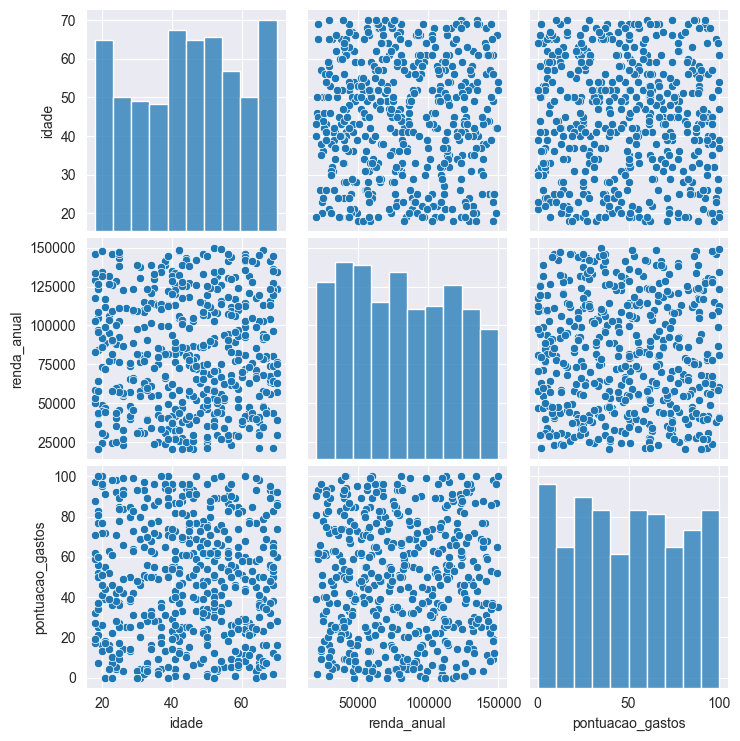

In [12]:
sns.pairplot(df.drop(['id'], axis=1));

---
<a id='machine-learning'></a>
### 3.3. Machine Learning

In [13]:
# Cria um padronizador, aplica nos dados e exibe as 5 primeiras linhas
padronizador = StandardScaler()
dados_padronizados = padronizador.fit_transform(df.drop(['id'], axis=1))
dados_padronizados[0:5]

array([[ 0.74012478,  0.35893538,  1.40506904],
       [ 1.59401387,  1.49192537,  0.05039391],
       [ 0.08328703,  0.13776654,  0.45679645],
       [-0.83628583,  0.906235  ,  1.64213719],
       [ 1.00285989, -1.2160111 ,  0.08426079]])

In [14]:
# Cria um agrupador com 3 centróides e aplica aos dados
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(dados_padronizados)

KMeans(n_clusters=3)

In [15]:
# Cria uma coluna com o segmento calculado, e exibe a contagem por centróide
df['segmento'] = kmeans.labels_
df['segmento'] = df['segmento'].apply(str).replace({'0':'A', '1':'B', '2':'C'})
df['segmento'].value_counts()

A    187
B    166
C    147
Name: segmento, dtype: int64

In [16]:
# Salva dados com os seus respectivos segmentos
df.to_csv('dados_segmentos.csv', index=False)
df.head()

,id,idade,renda_anual,pontuacao_gastos,segmento
0,1,56,94740,90,C
1,2,69,136352,50,C
2,3,46,86617,62,A
3,4,32,114841,97,B
4,5,60,36896,51,A


In [17]:
# Verificar se centroide 0 1 e2 são A B C
centroides = pd.DataFrame(kmeans.cluster_centers_)
centroides

,0,1,2
0,0.56,-0.82,0.20
1,-1.14,0.00,-0.17
2,0.58,1.04,-0.07


In [18]:
# Cria um dataframe com as informações dos centróides
centroides = pd.DataFrame(kmeans.cluster_centers_)
centroides.index = ['A', 'B', 'C']
centroides.columns = df.drop(['id', 'segmento'], axis=1).columns
centroides

,idade,renda_anual,pontuacao_gastos
A,0.56,-0.82,0.20
B,-1.14,0.00,-0.17
C,0.58,1.04,-0.07


In [19]:
# Adiciona 'segmento' como coluna e salva os dados em um arquivo csv.
centroides =  centroides.reset_index()
centroides.rename(columns={'index': 'segmento'}, inplace=True)
centroides.to_csv('dados_centroides.csv', index=False)
centroides

,segmento,idade,renda_anual,pontuacao_gastos
0,A,0.56,-0.82,0.20
1,B,-1.14,0.00,-0.17
2,C,0.58,1.04,-0.07


---
<a id='conclusion'></a>
## 4. Conclusão

Os resultados do processamento dos dados e da segmentação foram armazendos em dois arquivos csv. Assim a análise pode ser continuada a ser feita no Power BI, de modo que esta ferramenta possa ser usada apenas para gerar os gráficos.

---
<a id='references'></a>
## Referências

Data Science Academy - Microsoft Power BI Para Business Intelligence e Data Science, Acessado em 01/05/2023.


---
<div style="text-align: center"> Copyright &copy; 2023 | Leonardo Simões | All Rights Reserved </div>

---